In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from keras.applications import VGG16
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.layers import Input

In [3]:
# Step 1: Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [4]:
# Step 2: Preprocess the data
# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [5]:
# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [6]:
# Step 3: Load the pre-trained VGG16 model without the top layer (i.e., the classifier)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
# Freeze the layers of the VGG16 model so that they are not trained
for layer in base_model.layers:
    layer.trainable = False

In [8]:
# Step 4: Build the custom model using the pre-trained VGG16
# Add a global average pooling layer, followed by a fully connected layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout to prevent overfitting
predictions = Dense(10, activation='softmax')(x)

In [9]:
# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

In [10]:
# Step 5: Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
# Step 6: Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6457 - loss: 1.0046 - val_accuracy: 0.6178 - val_loss: 1.0887
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6520 - loss: 0.9835 - val_accuracy: 0.6258 - val_loss: 1.0769
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.6527 - loss: 0.9755 - val_accuracy: 0.6229 - val_loss: 1.0836
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.6634 - loss: 0.9550 - val_accuracy: 0.6244 - val_loss: 1.0752
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6646 - loss: 0.9504 - val_accuracy: 0.6265 - val_loss: 1.0793
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6636 - loss: 0.9444 - val_accuracy: 0.6249 - val_loss: 1.0868
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.6704 - loss: 0.9344 - val_accuracy: 0.6236 - val_loss: 1.0849
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6759 - loss: 0.9237 - val_a

In [13]:
# Step 7: Plot accuracy and loss vs epochs
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

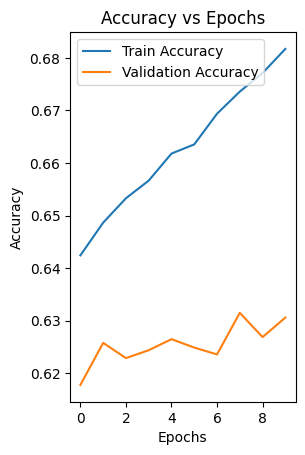

In [14]:
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

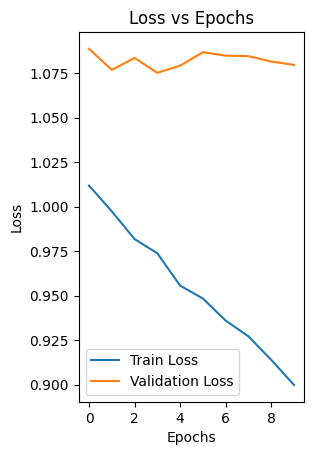

In [15]:
# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [24]:
# Step 8: Evaluate the model on a test image
# Let's pick a random image from the test set and see the prediction
import random
index = random.randint(0, x_test.shape[0] - 1)
test_image = x_test[index]
print(np.argmax(y_test[index]))
true_label = np.argmax(y_test[index])

5


In [25]:
# Predict the class of the image
prediction = model.predict(np.expand_dims(test_image, axis=0))
predicted_label = np.argmax(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


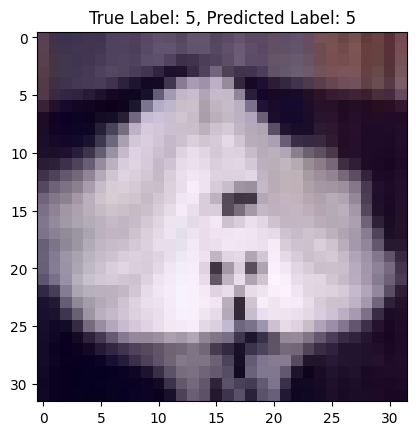

In [26]:
# Display the test image and predicted label
plt.imshow(test_image)
plt.title(f"True Label: {true_label}, Predicted Label: {predicted_label}")
plt.show()